In [11]:
%matplotlib inline

import os, sys
sys.path.append('../../')
from utils import plot_psd, nmse
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

Determine experiments parameters

In [12]:
train_size = 3341
seed_0 = 1
epochs = 200
exp_num = 5
methods = ['mnm_lev_marq', 'newton_lev_marq', 'cubic_newton', 'cubic_newton_simple']

In order to plot reproduced results of simulations uncomment reproduced = "reproduced_".
In order to plot results of simulations, provided by authors uncomment reproduced = "".

In [13]:
# reproduced = "reproduced_"
reproduced = ""

Determine plot parameters

In [14]:
linewidth = 1
fontsize = 13
xlabel = 'iterations'
ylabel = 'MSE'
legend = ["LM-MNM", "LM-NM", "CNM", "CMNM"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple"]
start_points = ["", "real_init", "imaginary_init"]
yticks_expanded = np.arange(0.32, 0.4, 0.01)
yticks_whole = np.arange(0.32, 0.52, 0.02)
ylim_expanded = [0.325, 0.39]
ylim_whole = [0.32, 0.5]
yticks = [yticks_whole, yticks_expanded]
ylim = [ylim_whole, ylim_expanded]
figsize=(16, 6)
shade_param = 0.15

Consider complex-valued MLP. Plot Learning mean, min-max range learning curves for each of the considered training algorithms: LM-MNM, LM-NM, CNM, CMNM, - and for each of the starting points purely real, purely imaginary and complex.

Learning curves corresponding to  starting points:


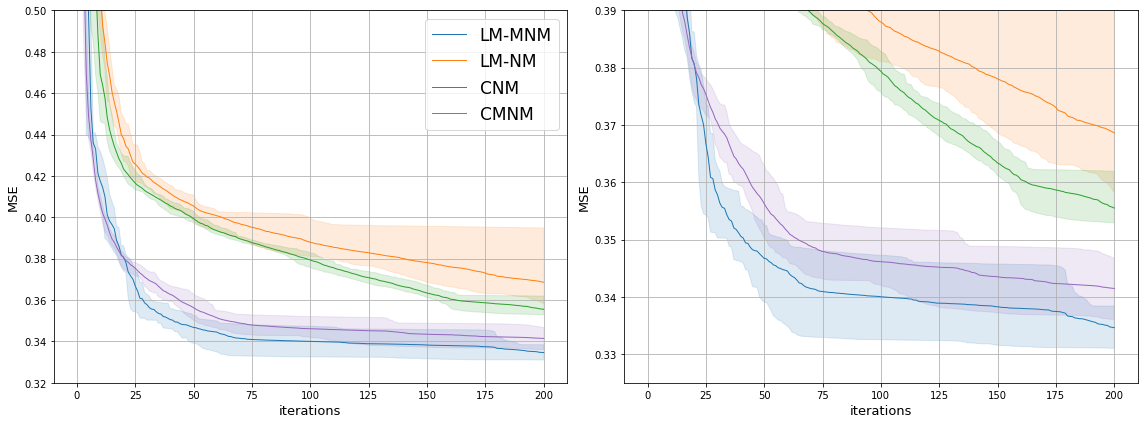

Learning curves corresponding to real_init starting points:


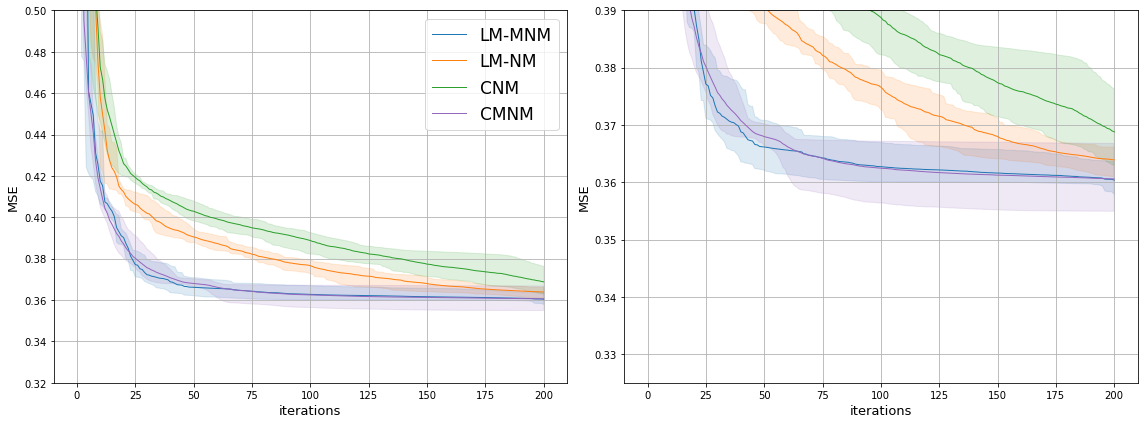

Learning curves corresponding to imaginary_init starting points:


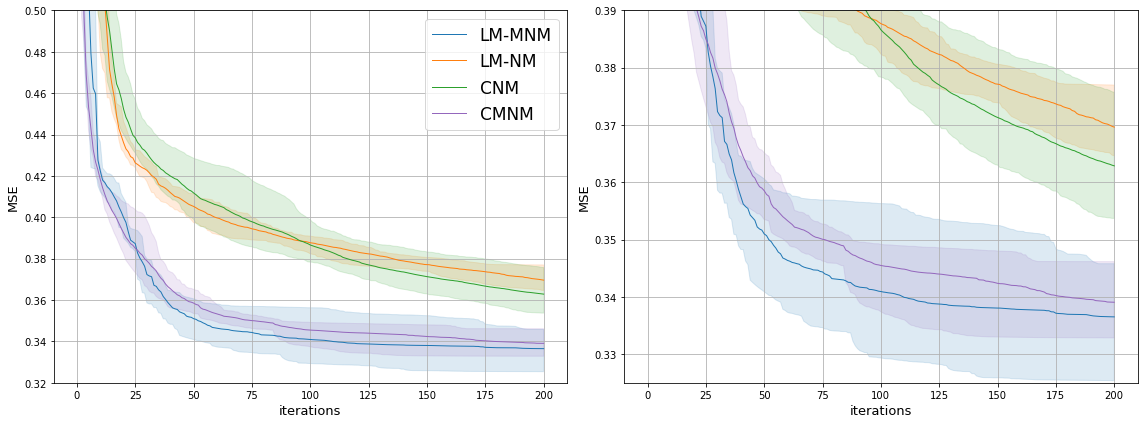

In [15]:
lc_all_cmlp = []
for start_p in start_points:
    lc_train = np.zeros((len(methods), exp_num, epochs + 1))
    lc_aver = np.zeros((len(methods), epochs + 1))
    lc_min = np.zeros((len(methods), epochs + 1))
    lc_max = np.zeros((len(methods), epochs + 1))
    
    for j_method, method in enumerate(methods):
        for exp in range(exp_num):
            exp_name = reproduced + f"complex_hidden=10_std=0.1_{method}_{start_p}_{seed_0+exp}"
            add_folder = os.path.join(reproduced + "results")
            curr_path = os.getcwd()
            load_path = os.path.join(curr_path, add_folder, exp_name)
            # Plot learning curve for quality criterion
            lc_train[j_method, exp, :] = np.load(os.path.join(load_path, "lc_train_" + exp_name + ".npy"))[:epochs + 1] / train_size

        lc_aver[j_method, :] = np.mean(lc_train[j_method, :, :], axis=0)
        lc_min[j_method, :] = np.min(lc_train[j_method, :, :], axis=0)
        lc_max[j_method, :] = np.max(lc_train[j_method, :, :], axis=0)

    print(f"Learning curves corresponding to {start_p} starting points:")
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    for i_graph in range(2):
        for i_method, method in enumerate(methods):
            ax[i_graph].fill_between(
                range(epochs + 1), lc_min[i_method, :], lc_max[i_method, :], 
                color=colors[i_method], alpha=shade_param,
            )
            ax[i_graph].plot(
                lc_aver[i_method, :], color=colors[i_method], linestyle='solid', 
                label=legend[i_method], linewidth=linewidth, 
            )

        ax[i_graph].set_xlabel(xlabel, fontsize=fontsize)
        ax[i_graph].set_ylabel(ylabel, fontsize=fontsize)
        ax[i_graph].set_yticks(yticks[i_graph])
        ax[i_graph].set_ylim(ylim[i_graph])
        ax[i_graph].grid()

        if i_graph == 0:
            ax[i_graph].legend(fontsize=fontsize + 4, loc='upper right')

    lc_all_cmlp.append(lc_train)

    plt.tight_layout()
    plt.show()


Plot learning curves related to real-valued MLP for Abalone task below:

Determine experiment and plot parameters

In [16]:
methods = ['newton_lev_marq', 'cubic_newton']
legend = ["LM-NM", "CNM"]
colors = ["tab:orange", "tab:green"]
ylim_expanded = [0.35, 0.40]
ylim = [ylim_whole, ylim_expanded]

Plot Learning mean, min-max range learning curves for each of the considered training algorithms: LM-NM, CNM for real-valued MLP training

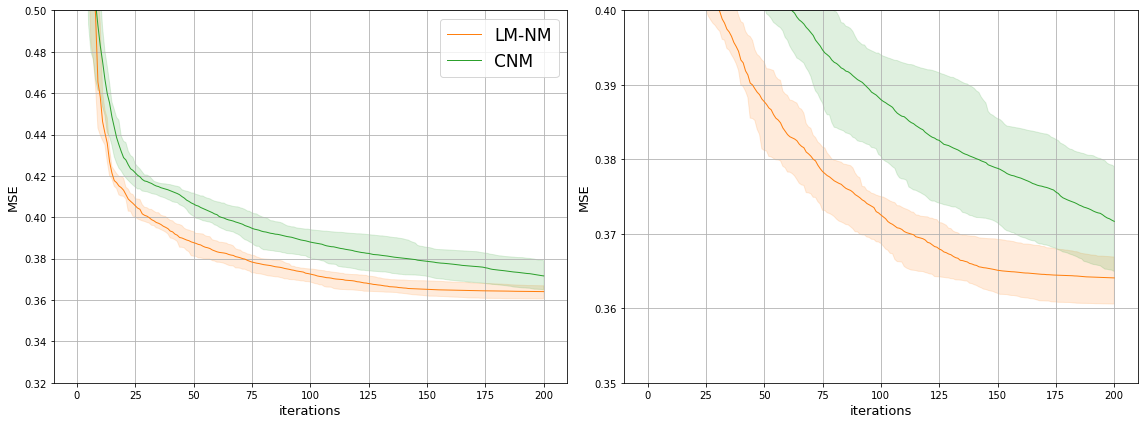

In [17]:
lc_train = np.zeros((len(methods), exp_num, epochs + 1))
lc_aver = np.zeros((len(methods), epochs + 1))
lc_min = np.zeros((len(methods), epochs + 1))
lc_max = np.zeros((len(methods), epochs + 1))

for j_method, method in enumerate(methods):
    for exp in range(exp_num):
        exp_name = reproduced + f"real_hidden=10_std=0.1_{method}__{seed_0+exp}"
        add_folder = os.path.join(reproduced + "results")
        curr_path = os.getcwd()
        load_path = os.path.join(curr_path, add_folder, exp_name)
        # Plot learning curve for quality criterion
        lc_train[j_method, exp, :] = np.load(os.path.join(load_path, "lc_train_" + exp_name + ".npy"))[:epochs + 1] / train_size

    lc_aver[j_method, :] = np.mean(lc_train[j_method, :, :], axis=0)
    lc_min[j_method, :] = np.min(lc_train[j_method, :, :], axis=0)
    lc_max[j_method, :] = np.max(lc_train[j_method, :, :], axis=0)

fig, ax = plt.subplots(1, 2, figsize=figsize)

for i_graph in range(2):
    for i_method, method in enumerate(methods):
        ax[i_graph].fill_between(
            range(epochs + 1), lc_min[i_method, :], lc_max[i_method, :], 
            color=colors[i_method], alpha=shade_param,
        )
        ax[i_graph].plot(
            lc_aver[i_method, :], color=colors[i_method], linestyle='solid', 
            label=legend[i_method], linewidth=linewidth, 
        )

    ax[i_graph].set_xlabel(xlabel, fontsize=fontsize)
    ax[i_graph].set_ylabel(ylabel, fontsize=fontsize)
    ax[i_graph].set_yticks(yticks[i_graph])
    ax[i_graph].set_ylim(ylim[i_graph])
    ax[i_graph].grid()

    if i_graph == 0:
        ax[i_graph].legend(fontsize=fontsize + 4, loc='upper right')

plt.tight_layout()
plt.show()

Compare convergence speed of CMNM and LM-MNM for complex-valued MLP and LM-NM for real-valued MLP

In [18]:
# Consider learning curves which correspond to CV-CNN
lc_train_cmlp = np.array(lc_all_cmlp)
# Leave learning curves, which correspond to LM-MNM and CMNM
lc_train_cmlp = lc_train_cmlp[:, ::3, ...]
lc_train_cmlp = lc_train_cmlp.reshape(lc_train_cmlp.shape[1], lc_train_cmlp.shape[0] * lc_train_cmlp.shape[2], lc_train_cmlp.shape[3])
lc_train_rmlp = lc_train[:1, ...]

Determine plot parameters

In [19]:
methods_real_mlp = ["newton_lev_marq"]
methods_complex_mlp = ['mnm_lev_marq', 'simple_cubic_newton']
legend = ["Real model, LM-NM", "Complex model, LM-MNM", "Complex model, CMNM"]
colors = ["tab:orange", "tab:blue", "tab:purple"]
ylim_expanded = [0.325, 0.39]
ylim_whole = [0.32, 0.5]
ylim = [ylim_whole, ylim_expanded]

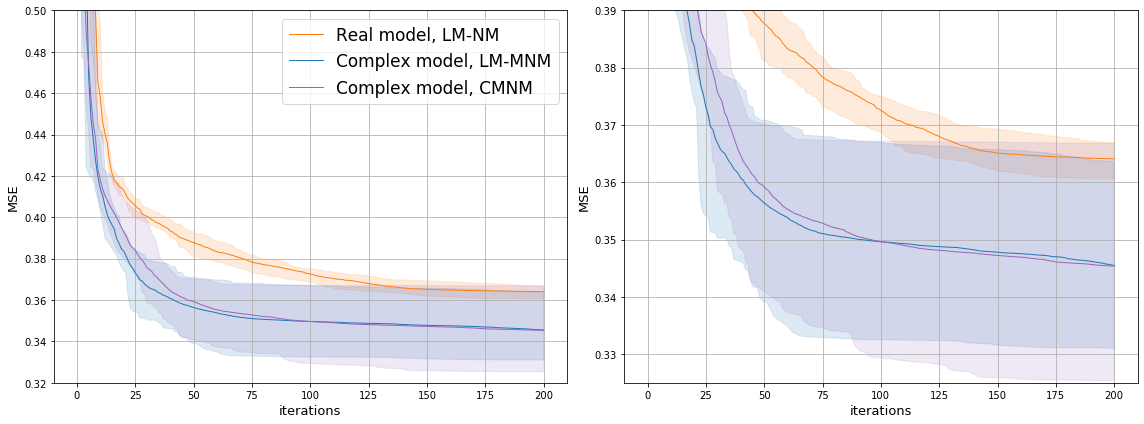

In [20]:
lc_aver, lc_min, lc_max = [], [], []

# Calculate, min, max, average learning curves for real-valued MLP
lc_aver.append(np.mean(lc_train_rmlp[0, :, :], axis=0))
lc_min.append(np.min(lc_train_rmlp[0, :, :], axis=0))
lc_max.append(np.max(lc_train_rmlp[0, :, :], axis=0))

# Calculate, min, max, average learning curves for complex-valued MLP
for j_method, method in enumerate(methods_complex_mlp):
    lc_aver.append(np.mean(lc_train_cmlp[j_method, :, :], axis=0))
    lc_min.append(np.min(lc_train_cmlp[j_method, :, :], axis=0))
    lc_max.append(np.max(lc_train_cmlp[j_method, :, :], axis=0))
lc_aver = np.array(lc_aver)
lc_min = np.array(lc_min)
lc_max = np.array(lc_max)

fig, ax = plt.subplots(1, 2, figsize=figsize)

for i_graph in range(2):
    for i_method in range(len(methods_complex_mlp) + len(methods_real_mlp)):
        ax[i_graph].fill_between(
            range(epochs + 1), lc_min[i_method, :], lc_max[i_method, :], 
            color=colors[i_method], alpha=shade_param,
        )
        ax[i_graph].plot(
            lc_aver[i_method, :], color=colors[i_method], linestyle='solid', 
            label=legend[i_method], linewidth=linewidth, 
        )

    ax[i_graph].set_xlabel(xlabel, fontsize=fontsize)
    ax[i_graph].set_ylabel(ylabel, fontsize=fontsize)
    ax[i_graph].set_yticks(yticks[i_graph])
    ax[i_graph].set_ylim(ylim[i_graph])
    ax[i_graph].grid()

    if i_graph == 0:
        ax[i_graph].legend(fontsize=fontsize + 4, loc='upper right')

plt.tight_layout()
plt.show()